In [ ]:
# pared down to pittsburgh only
# locate neighborhood by zip (easiest for air)
# find release amount in weight per neighborhood
    # column name: REL_EST_AMT
    # filter when col = 0

[15201 15202 15203 15204 15205 15206 15207 15208 15212 15215 15218 15219
 15220 15224 15225 15226 15233 15236 15238 15239 15275]
{'Garfield': 71600.192167, 'East Liberty': 71600.192167, 'Morningside': 71600.192167, 'Lower Lawrenceville': 71600.192167, 'Polish Hill': 71600.192167, 'Bloomfield': 71600.192167, 'Central Lawrenceville': 71600.192167, 'Stanton Heights': 71600.192167, 'Strip District': 71600.192167, 'Upper Lawrenceville': 71600.192167, 'North Shore': 129315.0, 'Allegheny West': 129315.0, 'Manchester': 129315.0, 'Marshall-Shadeland': 129315.0, 'Central Northside': 129315.0, 'Allegheny Center': 129315.0, 'Brighton Heights': 129315.0, 'California-Kirkbride': 129315.0, 'Chateau': 129315.0, 'Brookline': 6542.0, 'Beltzhoover': 6542.0, 'Bon Air': 6542.0, 'Overbrook': 6542.0, 'Carrick': 6542.0, 'Mount Washington': 30917.0, 'Beechview': 30642.0, 'Glen Hazel': 5856089.0, 'Lincoln Place': 5856089.0, 'Hays': 5856089.0, 'Greenfield': 5856089.0, 'New Homestead': 5856089.0, 'Hazelwood': 585

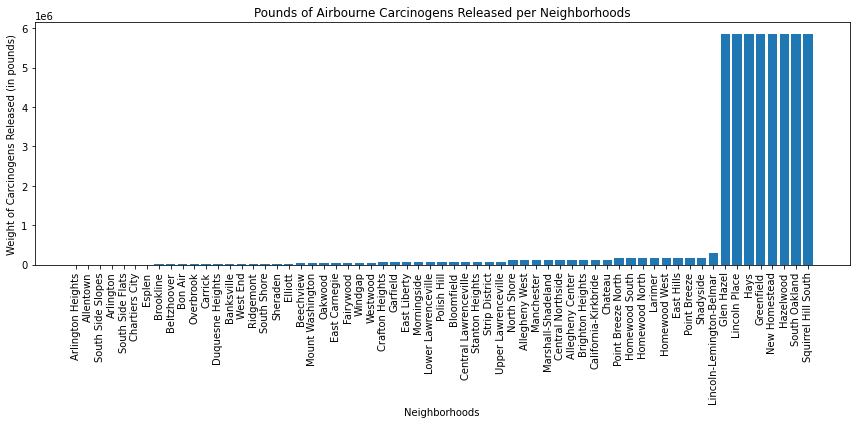

In [8]:
import pandas as pd
import fpsnippets
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#masking
air = pd.read_csv("filtered_tri_air.csv", usecols = ['CITY_NAME','COUNTY_NAME', 'ZIP_CODE', 'CARCINOGEN','REL_EST_AMT'])
pittsburgh = air['CITY_NAME'] == "PITTSBURGH"
air = air[pittsburgh]

#get zips and trim to 5 char zips
air = air[air['ZIP_CODE'].astype(str).str.len() <= 5]
air['ZIP_CODE'] = air['ZIP_CODE'].astype(int)

zips = air['ZIP_CODE'].unique()
zips.sort()
print(zips)

airDict=dict()
for index, row in air.iterrows():
    #get relevant neighborhoods for this row
    zip_code = row['ZIP_CODE']
    neighborhoods = fpsnippets.zip_to_neighborhoods(zip_code)
    
    for i in neighborhoods:
        if i in airDict:
            if row['CARCINOGEN'] == 'Y':
                airDict[i] += row['REL_EST_AMT']
    
        else:
            if row['CARCINOGEN'] == 'Y':
                airDict[i] = row['REL_EST_AMT']
print(airDict)

#sort
sorted_airDict = dict(sorted(airDict.items(), key=lambda item: item[1]))
airDF = pd.Series(sorted_airDict).to_frame()

print(airDF)
#plot it using matplotlib
plt.figure(figsize=(12, 6)) 
plt.bar(airDF.index, airDF[0])  # Assuming the index represents the x-axis values
plt.xlabel('Neighborhoods')  
plt.ylabel('Weight of Carcinogens Released (in millions of pounds)')  
plt.title('Pounds of Airbourne Carcinogens Released per Neighborhoods') 
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()